
# Thermal Data Lab
##### PH 212 COCC
##### Erin Szabo, Week 7

*intro stuff*

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mplot
import matplotlib.pyplot as plt
from numpy.polynomial import polynomial as ply

## Upload the data!!

Read in your .csv data file. Note that pd.read_csv will also number the lines which I already had in my data set. Remember from our previous discussion that the DataFrame (which is what the read_csv function creates has  various attributes that include the columns of data labeled by the descriptors in the header row. For me I read in two data sets to illustrate some of the potential concerns. In both cases I have about 1500 s of data (roughly 15 min). One has 300 data points and the other only 30.  

### NOTE:

When I save my data as a .csv file from a spreadsheet it uses a tab instead of a comma to separate the columns. Not surprisingly there is an argument for that! You'll notice the ```sep = '\t'``` argument which tells the read_csv function to expect a tab instead of a comma as a separator. If your .csv file is actually comma separated you can remove this argument.

In [14]:
# removed ,sep='\t' from second arg 
dataErin = pd.read_csv('TempW7.csv')
print(dataErin)
dataErin.dtypes

#still don't know why its printing that column twice...

     time  temperature
0       0        42.77
1       1        42.29
2       2        42.77
3       3        42.77
4       4        42.29
..    ...          ...
175   175        35.45
176   176        34.96
177   177        35.45
178   178        34.96
179   179        34.47

[180 rows x 2 columns]


time             int64
temperature    float64
dtype: object

## Fine Grain Data

This is the fine grain data I tool. Fine grain means that I was taking temperature data often and, one might argue, more often than needed. Mostly what is seen are tiny variations in the analog data read from the TMP36 which make it appear that the data has changed but it probably hasn't. You can imagine drawing a line through the core of the data which is likely to be more meaningful or one can just take data less often. See the next plot....

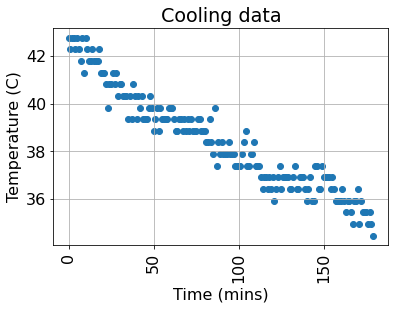

In [15]:
# code cell that creates the plot
dataErin['time'] = dataErin['time'].astype(float)
dataTime = dataErin['time']
dataTemp = dataErin['temperature']
fig, ax = plt.subplots()
ax.scatter(dataTime, dataTemp)

plt.rcParams.update({'font.size': 16}) # make labels easier to read
plt.xticks(rotation='vertical')
ax.set(xlabel='Time (mins)', ylabel='Temperature (C)',
       title='Cooling data')
ax.grid()

fig.savefig("myplot.png")
plt.show()

## Put a Line On It!

We learned how to use the polynomial fit routine last term in the Rock Drop lab among others. For a line we just do a fit with degree 1. Always look at the output of the process and make sure it is reasonable. Is it reasonable that the y intercept is 59 C and the slope is - .0067 ish? (for me this is almost exactly what I estimated)

After we find the coefficients of the polynomial then we generate the actual model data using the same process we did in the past. The only major difference is that I have added the model data to the data frame (from pandas) as a new column labeled ```'modelT'```  


In [16]:
degree = 1
coefs1 = ply.polyfit(dataTime, dataTemp,degree)
print("Fit to polynomial of deree; ", degree)
print("Coefficients of polynomial fit:", coefs1)

Fit to polynomial of deree;  1
Coefficients of polynomial fit: [ 4.18739644e+01 -3.83174172e-02]


In [19]:
# find number of data points and create model array
numPoints = len(dataTime)
modelTemp = np.full_like(dataTime,0)

# calculate the temperatures  predicted from the model
# model[i] = coefs[0] + coefs[1]*modeltime[i] + coefs[2]* modeltime[i]**2 + coefs[3]*modeltime[i]**3
for i in range (0,numPoints):
    modelTemp[i] = coefs1[0] + coefs1[1]*dataTime[i]

# add model array to data frame
dataErin['modelT'] = modelTemp
    
# print out generated data
dataErin


time  temperature     modelT
0      0.0        42.77  41.873964
1      1.0        42.29  41.835647
2      2.0        42.77  41.797330
3      3.0        42.77  41.759012
4      4.0        42.29  41.720695
..     ...          ...        ...
175  175.0        35.45  35.168416
176  176.0        34.96  35.130099
177  177.0        35.45  35.091782
178  178.0        34.96  35.053464
179  179.0        34.47  35.015147

[180 rows x 3 columns]

### ...actual plot...

Note that I don't have to redefine the original data arrays that I plotted I just need to add the model temperatures. I included the original process as comments for clarity. Then I scatter plot both sets of data one at a time.

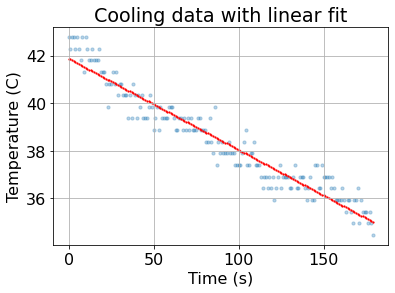

In [20]:
# set up data arrays for plots
# first two are already defined earlier but included here as comments
# for clarity
# dataTime = dataErin['time']
# dataTemp = dataErin['temperature']
############
dataModel = dataErin['modelT']
fig, ax = plt.subplots()
ax.scatter(dataTime, dataTemp, s= 10, alpha = .3)
ax.scatter(dataTime, dataModel, s = 5, color = 'red', linewidth = '0')

plt.rcParams.update({'font.size': 16}) # make labels easier to read
# plt.xticks(rotation='vertical')
ax.set(xlabel='Time (s)', ylabel='Temperature (C)',
       title='Cooling data with linear fit')
ax.grid()

#fig.savefig("myplot.png")
plt.show()

## What to Notice

I hope what you notice in the previous plot is that the slope of my model is too small at the beginning and too steep (large) at the end. There is the wierdness in my data there in the middle but still it seems like a solid conclusion.

lagsfjkhsdkl

What to do for a better fit? We could go to a quadratic fit and see.... it's all pretty straightforward since we already have the code. Please change the variable names to keep things tidy.

Fit to polynomial of deree;  2
Coefficients of polynomial fit: [ 4.24454680e+01 -5.75815841e-02  1.07621044e-04]


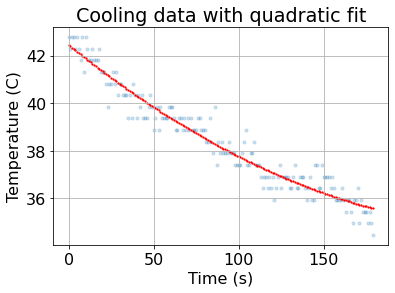

In [21]:
degree = 2
coefs2 = ply.polyfit(dataTime, dataTemp,degree)
print("Fit to polynomial of deree; ", degree)
print("Coefficients of polynomial fit:", coefs2)

# find number of data points and create model array
numPoints = len(dataTime)
modelTemp2 = np.full_like(dataTime,0)

# calculate the temperatures  predicted from the model
# model[i] = coefs[0] + coefs[1]*modeltime[i] + coefs[2]* modeltime[i]**2 + coefs[3]*modeltime[i]**3
for i in range (0,numPoints):
    modelTemp2[i] = coefs2[0] + coefs2[1]*dataTime[i] +coefs2[2]* dataTime[i]**2

# add model array to data frame
dataErin['modelTquad'] = modelTemp2
    
# print(modelTemp2)
# dataBruce['modelTquad']

# set up data arrays for plots
# dataTime = dataBruce['time(s)']
# dataTemp = dataBruce['temperature(C)']
# dataModel = dataBruce['modelT']
dataModelQ = dataErin['modelTquad']
fig, ax = plt.subplots()
ax.scatter(dataTime, dataTemp, s = 10, alpha = .2)
# ax.scatter(dataTime, dataModel)
ax.scatter(dataTime, dataModelQ , s = 5, color = 'red', linewidth = '0')

plt.rcParams.update({'font.size': 16}) # make labels easier to read
# plt.xticks(rotation='vertical')
ax.set(xlabel='Time (s)', ylabel='Temperature (C)',
       title='Cooling data with quadratic fit')
ax.grid()

#fig.savefig("myplot.png")
plt.show()

## Exponential Model

In MTH 256 you will explore a class of differential equations which are first order equations that describe things like population growth, interest bearing accounts, and heat flow. The solution to these problems has the general form...

$$ \Large T(t) = Ae^{kt} + C$$


...where T is the temperature and t is the time. C is the value of the function at t = infinite which would normally be room temperature. A is the initial value of the temperature relative to room temperature. k is the parameter that controls the curvature of the function. Let's try this out.



In [22]:
# find number of data points and create model array
# numPoints = len(dataTime)
modelTempExp = np.full_like(dataTime,0)

# parameters in the exponential model
verticalOffset = 25. # moves the plot up and down
initialValue = 35.  # combined with previous offset gives initial value
konstant = .00024  # controls rate at which plot bends.

# calculate the temperatures predicted from the model
# model[i] = coefs[0] + coefs[1]*modeltime[i] + coefs[2]* modeltime[i]**2 + coefs[3]*modeltime[i]**3
for i in range (0,numPoints):
    modelTempExp[i] = verticalOffset + initialValue*np.exp(-konstant*dataTime[i]) 

# add model array to data frame
dataBruce['modelTExp'] = modelTempExp

# set up data arrays for plots
# dataTime = dataBruce['time(s)']
# dataTemp = dataBruce['temperature(C)']
# dataModel = dataBruce['modelT']
# dataModelQ = dataBruce['modelTquad']
dataModelExp = dataBruce['modelTExp']
fig, ax = plt.subplots()
ax.scatter(dataTime, dataTemp, s = 10, alpha = .2)
#ax.scatter(dataTime, dataModelQ , color = 'green', linewidth = '0')
ax.scatter(dataTime, dataModelExp , s = 5, color = 'red', linewidth = '0')

plt.rcParams.update({'font.size': 16}) # make labels easier to read
# plt.xticks(rotation='vertical')
ax.set(xlabel='Time (s)', ylabel='Temperature (C)',
       title='Cooling data with exponential model')
ax.grid()

#fig.savefig("myplot.png")
plt.show()

NameError: name 'dataBruce' is not defined

## How the Models Diverge

Now we have roughly explored three models for our data. A linear model, a quadratic model, and an exponential model. They all are reasonable (possibly) approximations of the data. How might we discern which is a better model? One way to approach the question is to ask what would happen if I had more data. We can consider this by extending our existing models beyond the limits of our current data set and make predictions.



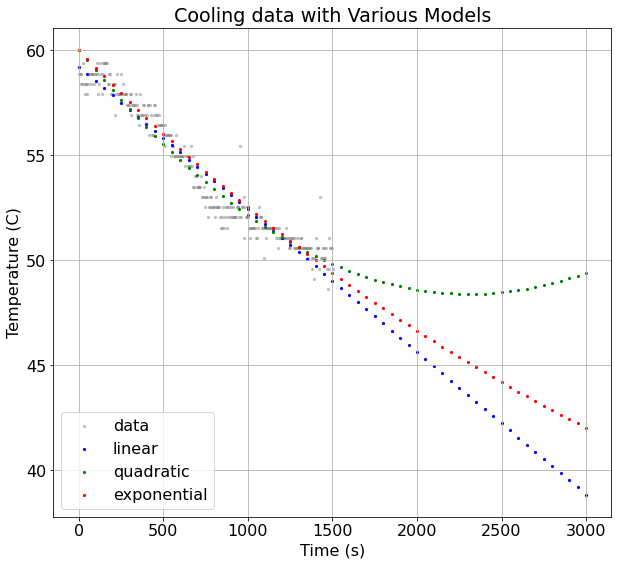

In [25]:
# setting up parameters of extended model
maxTime = 3000 # maximum desired time in s
numData = 61   # number of data points to generate across the time span
modelTime = np.linspace(0.,maxTime,numData) 

modelLinear = np.full_like(modelTime,0)
modelQuad = np.full_like(modelTime,0)
modelExp = np.full_like(modelTime,0)

# generate temperatures for extended lines
for i in range (0,numData):
    modelLinear[i] = coefs1[0] + coefs1[1]*modelTime[i]
for i in range (0,numData):
    modelQuad[i] = coefs2[0] + coefs2[1]*modelTime[i] +coefs2[2]* modelTime[i]**2
for i in range (0,numData):
    modelExp[i] = verticalOffset + initialValue*np.exp(-konstant*modelTime[i]) 
    
fig, ax = plt.subplots()
ax.scatter(dataTime, dataTemp, s = 5, color = 'grey', alpha = .4, label = 'data')
ax.scatter(modelTime, modelLinear, s = 10, color = 'blue', linewidth = '0', label = 'linear')
ax.scatter(modelTime, modelQuad , s = 10, color = 'green', linewidth = '0', label = 'quadratic')
ax.scatter(modelTime, modelExp , s = 10, color = 'red', linewidth = '0',label = "exponential")

plt.rcParams.update({'font.size': 16}) # make labels easier to read
# plt.xticks(rotation='vertical')
ax.set(xlabel='Time (s)', ylabel='Temperature (C)',
       title='Cooling data with Various Models')
ax.grid()
ax.legend(loc= 3)
fig.set_size_inches(10, 9)

#fig.savefig("myplot.png")
plt.show()

## Conclusions:

As a result of what you see on the plot how much longer will you need to gather data to begin to distinguish among the various models we have proposed? Be sure to look at the scatter in the data (because it's real data) in making this determination. 

For my data I would argue that another 500 s will tell me whether the quadratic model is still viable and probably close to 1000 s more to be able to confidently distinguish between the linear and exponential models.